# Redes Neuronales: Algoritmo Backpropagation

## RafaCastle

### Objetivo de este trabajo:

Ampliar el programa realizado para el ejercicio 2 del módulo 8 (dónde se construyó una red neuronal con 2 entradas y 2 capas ocultas), a un programa que pueda construir una red neuronal con $n$ capas ocultas y un número de neuronas variable en cada una de ellas, además de incrementar la cantidad de inputs que pueden imponerse en la misma. 

# Algoritmo de Backpropagation

Comúnmente se entrenan usando
métodos de optimización basados en gradientes.

Backpropagation es el algoritmo que permite cuantificar la influencia que tiene cada peso y sesgo de la red en sus predicciones. Para conseguirlo, hace uso de la regla de la cadena (chain rule) para calcular el gradiente, que no es más que es el vector formado por las derivadas parciales de una función.

Nos permite reducir el error cuadratico medio.

### **Propuesta:** Definir el algoritmo de Backpropagation para n número de capas y un número variable de neuronas.

In [1]:
#Cargamos las librerias necesarias para ejecutar el algoritmo creado.
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

Nuestra red neuronal densa está compuesta por una función de activación sigmoide:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

In [2]:
#definimos una función de activación sgmoide
def sigmoide(z):
    return 1 / (1 + np.exp(-z))

La función sigmoide tiene una derivada que está expresada en términos de la misma función, esto es, 

$$
\frac{\partial \sigma (z)}{\partial z} = \sigma(z) (1 - \sigma(z))
$$

In [3]:
#Obnetemos su derivada
def derivada_sigmoide(x):
    return x*(1 - x)

Función de pérdida de entropía cruzada binaria:

$$
ECB(\mathbf{y}, \mathbf{\hat{y}})  = -\sum_{i=1}^N \left[ y^{(i)} \log \hat{y}^{(i)} + (1 - y^{(i)}) \log (1 - \hat{y}^{(i)}) \right]
$$

In [4]:
def entropia_cruzada_binaria(y, p):
    p[p == 0] = np.nextafter(0., 1.)
    p[p == 1] = np.nextafter(1., 0.)
    return -(np.log(p[y == 1]).sum() + np.log(1 - p[y == 0]).sum())

Asimismo, calcularemos la exactitud para medir el rendimiento del modelo aprendido por la red neuronal densa:

$$
exactitud = \frac{correctos}{total}
$$

In [5]:
def exactitud(y, y_predicha):
    return (y == y_predicha).mean() * 100

### Ejemplo de red neuronal

Se muestra a continuación una red con 2 entradas, una capa oculta y una salida. Esta red neuronal tendría la forma $[2,3,1]$ ya que contiene 2 entradas, 3 neuronas en la capa oculta y una salida.

<img src="crop_NN.jpg">

Crearemos una clase **Red_Neuronal** para entrenar a la neurona a dar una **predicción precisa**. La clase también tendrá otras funciones auxiliares que resultarán útiles para graficar la pérdida y la exactitud y requiere que le sea otorgada la forma de la red neuronal.

In [6]:
class Red_Neuronal:
    def __init__(self, forma_red): 

        self.sigm = sigmoide
        self.derivada_sigm = derivada_sigmoide
        self.entr = entropia_cruzada_binaria
        self.exac = exactitud
        
        self.forma = forma_red # [2,3,1] en el ejemplo
        self.capas = len(forma_red) # 3 en el ejemplo
        self.pesos = []
        
        for capa in range(self.capas - 1):
            # pesos             (número de entradas, número de capas ocultas) 
            W = 2*np.random.rand(forma_red[capa] + 1, forma_red[capa+1]) - 1 # números aleatorios entre -1 y 1
            self.pesos.append(W)

    #forwardpropagation
    def hacia_delante(self, x):
        y = x

        for i in range(len(self.pesos)-1): # hasta la penúltima capa
            z = np.dot(y[i], self.pesos[i])
            sigm = self.sigm(z)

            # agregando el sesgo
            sigm = np.concatenate((np.ones(1), np.array(sigm)))
            y.append(sigm)

        # última capa
        z = np.dot(y[-1], self.pesos[-1])
        sigm = self.sigm(z)
        y.append(sigm)

        return y
    
    # backpropagation
    def hacia_atras(self, y, target, tasa_aprendizaje):
        # diferencia 
        error = target - y[-1] 
        vec_delta = [error * self.derivada_sigm(y[-1])]

        # reiniciando
        for i in range(self.capas-2, 0, -1):
            error = vec_delta[-1].dot(self.pesos[i][1:].T)
            error = error*self.derivada_sigm(y[i][1:])
            vec_delta.append(error)
       
        vec_delta.reverse()
        
        # Finalmente ajustamos los pesos con la regla de Backpropagation
        for i in range(len(self.pesos)):
            capa = y[i].reshape(1, self.forma[i]+1)
            delta = vec_delta[i].reshape(1, self.forma[i+1])
            self.pesos[i] += tasa_aprendizaje*capa.T.dot(delta)
    
    def fit(self, data, labels, tasa_aprendizaje=0.1, n_epocas=1000):
        
        
        unos = np.ones((1, data.shape[0]))
        Z = np.concatenate((unos.T, data), axis=1)
        
        for k in range(n_epocas):
        
            muestras = np.random.randint(X.shape[0])
            # Propagación
            x = [Z[muestras]]
            y = self.hacia_delante(x)
            # Ajustando los pesos:
            target = labels[muestras]
            self.hacia_atras(y, target, tasa_aprendizaje)
            
    # similar a fit, sirve para obtener la mejoría de la exactitud conforme avanzan las épocas
    def perdida_exactitud(self, data, labels, tasa_aprendizaje=0.1, n_epocas=1000):
        
        perdidas = np.zeros((n_epocas))
        exactitudes = np.zeros((n_epocas))
        y_predicha = np.zeros((labels.shape))
        
        unos = np.ones((1, data.shape[0]))
        Z = np.concatenate((unos.T, data), axis=1)
        
        for k in range(n_epocas):
        
            muestras = np.random.randint(X.shape[0])
            # Propagación
            x = [Z[muestras]]
            y = self.hacia_delante(x)
            # Ajustando los pesos:
            target = labels[muestras]
            self.hacia_atras(y, target, tasa_aprendizaje)
            
            cont=0
            for s in X:
                y_predicha[cont] = self.prediccion_d(s)
                cont+=1
                
            perdidas[k] = entropia_cruzada_binaria(labels, y_predicha)
            exactitudes[k] = exactitud(labels, np.round(y_predicha))
            
        return perdidas, exactitudes

    
    def prediccion_d(self, x):
        # aplicando el sigmoide
        valor = np.concatenate((np.ones(1).T, np.array(x)))
        for i in range(0, len(self.pesos)):
            valor = self.sigm(np.dot(valor, self.pesos[i]))
            valor = np.concatenate((np.ones(1).T, np.array(valor)))
        return valor[1]
    
    def predict(self, X):
        #predicción
        Y = np.array([]).reshape(0, self.forma[-1])
        for x in X:
            y = np.array([[self.prediccion_d(x)]])
            Y = np.vstack((Y,y))
        return Y

Esta función servirá para graficar las regiones de decisión del algoritmo

In [7]:
def grafico(X, y, red, test_i=None):

    # colores y puntos
    tipo_de_puntos = ('s', 'x')
    colores = ('green', 'orange')
    cmap = ListedColormap(colores[:len(np.unique(y))])
    
    # regiones de desición para obtener un dominio de -1 a 1
    x1_min = X[:, 0].min() - 1
    x2_min = X[:, 1].min() - 1
    x1_max =  X[:, 0].max() + 1
    x2_max =  X[:, 1].max() + 1
    X1, X2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),np.arange(x2_min, x2_max, 0.02))
    
    Z = red.predict(np.array([X1.ravel(), X2.ravel()]).T)
    Z = Z.reshape(X1.shape)
    
    # se grafica la región de desición
    plt.contourf(X1, X2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())

    # se grafican los puntos
    for i, j in enumerate(np.unique(y)):
        plt.scatter(x=X[y == j, 0], y=X[y == j, 1], c=cmap(i),marker=tipo_de_puntos[i], label=j)

A continuación se obtendrán los resultados calculados para la puerta lógica XOR, junto con las regiones de decisión en 2 dimensiones que las redes neuronales construyen dependiendo de su forma y del número de épocas impuesto en el algoritmo.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


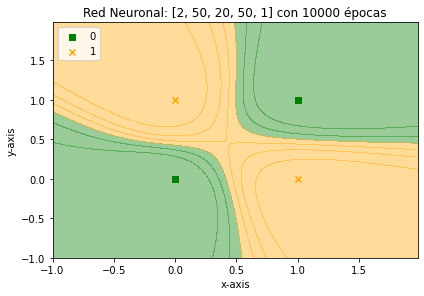

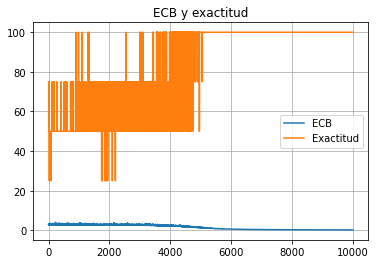

Predicción Final
[0 0] 0.021059985443231122
[0 1] 0.9773630647374651
[1 0] 0.9786614431897023
[1 1] 0.02323856031115058


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


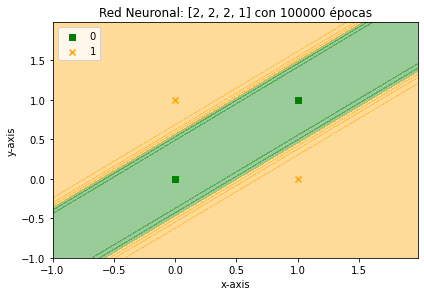

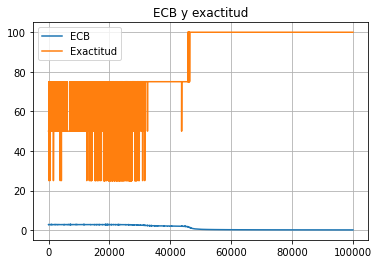

Predicción Final
[0 0] 0.011081960151920657
[0 1] 0.9862507632214734
[1 0] 0.9877948210010502
[1 1] 0.010119699136372262


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


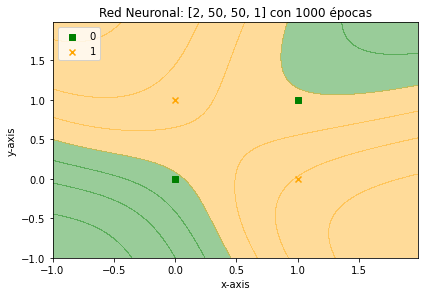

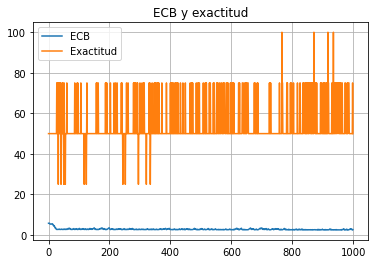

Predicción Final
[0 0] 0.48327637291059133
[0 1] 0.6502869380541149
[1 0] 0.704542539105514
[1 1] 0.5191942571583741


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


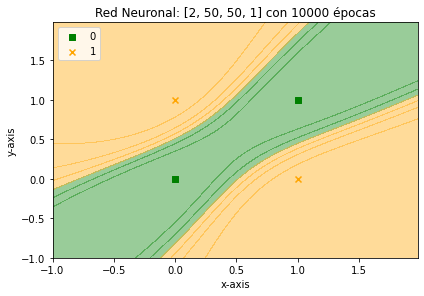

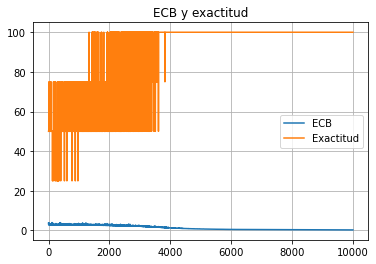

Predicción Final
[0 0] 0.029761824491274378
[0 1] 0.9675529347766674
[1 0] 0.9708308443065355
[1 1] 0.03100880225449262


In [8]:
# Xor 
np.random.seed(0)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# las redes que vamos a probar
redes=[[[2,50,20,50,1],10000],[[2,2,2,1],100000],[[2,50,50,1],1000],[[2,50,50,1],10000]]

for red in redes:
    
    nat_net = Red_Neuronal(red[0])
    perdidas, exactitudes = nat_net.perdida_exactitud(X,np.array([[0, 1, 1, 0]]).T,n_epocas=red[1])
    nat_net.fit(X, y, n_epocas=red[1])

    # regiones
    grafico(X, y, nat_net)
    plt.xlabel('x-axis')
    plt.ylabel('y-axis')
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.title(f"Red Neuronal: {red[0]} con {red[1]} épocas")
    plt.show()
    
    #exactitud y ECB
    plt.plot(np.arange(perdidas.size), perdidas, label='ECB')
    plt.plot(np.arange(exactitudes.size), exactitudes, label='Exactitud')
    plt.legend()
    plt.grid(True)
    plt.title(f"ECB y exactitud")
    plt.show()

    print("Predicción Final")
    for s in X:
        print(s, nat_net.prediccion_d(s))

#### Analizando las redes  individualmente
Dos entradas, tres capas ocultas, una salida y diez mil epocas.\
[[2,50,20,50,1],10000]:
Se observa una buena predicción final, mientras la perdida tiende a bajar y la exactitud a subir a traves de que las epocas avanzan.

Dos entradas, dos capas ocultas, una salida y cien mil epocas.\
[[2,2,2,1],100000]: 
Se tiene una buena predicción final, mientras la perdida tiende a bajar y la exatitud a subir aproximadamente en la epoca 50000 se observa que ha llegado al punto minimo en perdida y máximo en exactitud. En el gráfico se puede apreciar una clara sepración lineal.

Dos entradas, dos capas ocultas, una salida y mil epocas.\
[[2,50,50,1],1000]: 
Para este caso no encontramos una buena predicción y se puede observar que tanto la perdida como la exactitud se encuentran muy variables. Finalmente su gráfico se muestra muy lejano a una separación líneal, lo cual indica la lejania del modelo por ser el ideal en esta ocasión.

Dos entradas, dos capas ocultas, una salida y diez mil epocas.\
[[2,50,50,1],10000]]: 
Se observa una buena predicción final, mientras la perdida tiende a bajar y la exatitud a subir y se mantiene desde las primeras epocas, sin embargo se cree que aún puede mejorar incrementando el número de epocas.

### Conclusiones y discusión

Al realizar una comparativa de estas redes nos percatamos que:

•Incrementar la cantidad de neuronas en las capas ocultas genera una mejor exactitud en menor cantidad de épocas.

•Incrementar la cantidad de capas ocultas genera una mejor exactitud, pero es necesario incrementar en gran cantidad el número de épocas.

•Incrementar la cantidad de épocas también mejora la exactitud y tiene un efecto interesante en las regiones de desición, conforme el número de épocas incrementa, las hipérbolas que representan las líneas de superficie van tendiendo a ser líneas rectas paralelas.

Resulta interesante que aunque se llegue a un mismo nivel de exactitud, las regiones de desición sean tan distintas entre sí, al parecer las regiones de desición se ven fuertemente afectadas por el número de épocas, más que por la cantidad de neuronas en la red.

## Agregando un input

Dado que se tiene control sobre la forma de la red neuronal, es posible incrementar la cantidad de inputs que se le dá a la misma, por lo tanto resulta interesante agregar una entrada booleana para corroborar si la red neuronal logra aproximarse a los valores esperados para dos puertas lógicas.

Tomando ahora un caso con 3 inputs, se tiene una tabla de verdad de la forma:

$$
\begin{array}{|c|c|c|c|c|} \hline
V1 & V2 & V3 & Xor(V1,V2) & Xor(Xor(V1,V2),V3) \\ \hline
1 & 1 & 1 & 0 & 1 \\ \hline
0 & 0 & 1 & 0 & 1 \\ \hline
0 & 1 & 0 & 1 & 1 \\ \hline
1 & 0 & 0 & 1 & 1 \\ \hline
0 & 1 & 1 & 1 & 0 \\ \hline
1 & 0 & 1 & 1 & 0 \\ \hline
1 & 1 & 0 & 0 & 0 \\ \hline
0 & 0 & 0 & 0 & 0 \\ \hline
\end{array}
$$

Dónde buscaremos obtener a la última columna mediante la red neuronal $[3,50,50,1]$

Red Neuronal: [3,50,50,1] con 100000 épocas
Predicción Final
[1 1 1] 0.9882197820975955
[0 0 1] 0.983797782714973
[0 1 0] 0.9833249710639815
[1 0 0] 0.9842041597318153
[0 1 1] 0.01329521617437373
[1 0 1] 0.01408998000795041
[1 1 0] 0.016374849606148607
[0 0 0] 0.014780974518550484


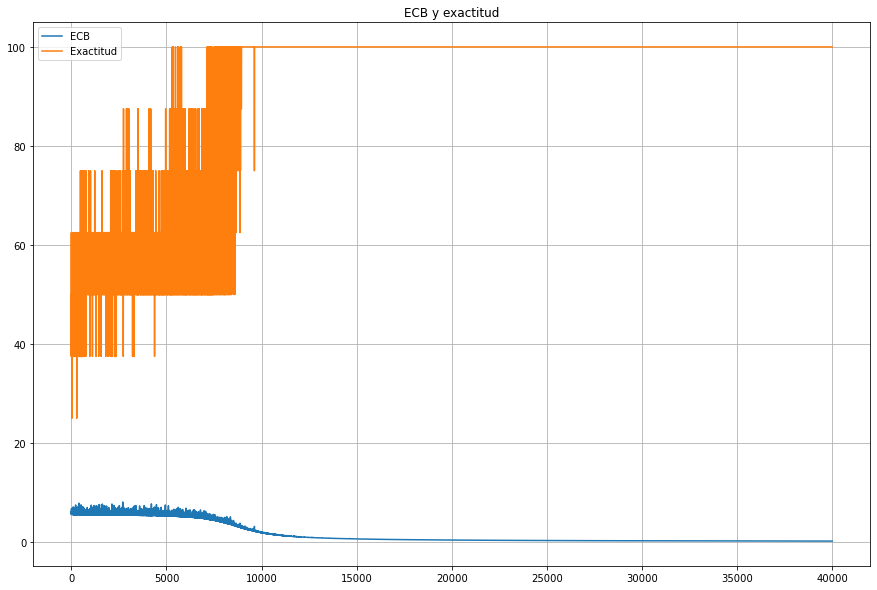

In [9]:
nat_net = Red_Neuronal([3,50,50,1])

X = np.array([[1, 1, 1], [0, 0, 1], [0, 1, 0], [1, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 0], [0, 0, 0]])
y = np.array([1, 1, 1, 1, 0, 0, 0, 0])

perdidas, exactitudes = nat_net.perdida_exactitud(X,np.array([[1, 1, 1, 1, 0, 0, 0, 0]]).T,n_epocas=40000)
nat_net.fit(X, y, n_epocas=40000)

print("Red Neuronal: [3,50,50,1] con 100000 épocas")
print("Predicción Final")
for s in X:
    print(s, nat_net.prediccion_d(s))
    
plt.figure(figsize=(15,10))
plt.plot(np.arange(perdidas.size), perdidas, label='ECB')
plt.plot(np.arange(exactitudes.size), exactitudes, label='Exactitud')
plt.legend()
plt.grid(True)
plt.title(f"ECB y exactitud")
plt.show()

Ajustamos este algoritmo con más neuronas y más épocas dado que nos resulto favorable al implementarlo con dos inputs.\
Los resultados fueron favorables alcanzado niveles de pérdida muy bajos y una exactitud alta al llegar desde la época 20000. 

### Proyección
Adicionalmente se planeaba contruir un gráfico para el caso con 3 inputs en 3D sin embargo se concidera un reto ambicioso en costo computacional, por lo cual se deja el antecedente para aplicarlo en proximos proyectos. Sería también interesante analizar las regiones de desición en función del número de épocas, del número de neuronas y del número de capas ocultas. 